In [1]:
import requests
import urllib.request as ur
import json
import glob 
from pandas.io.json import json_normalize 
import time
from datetime import date
import pandas as pd
import _thread
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import numpy as np

In [11]:
#looking at the geolocation from where the test were conducted in DR Congo
import plotly.offline as py
df = pd.DataFrame()
df = pd.read_csv('Africa_2015_2020_Downloads_tests.csv')
data = dict(
        type = 'scattergeo',
        locationmode = 'city names', 
        mode = 'markers'
        )

data_tests = data.copy()
data_tests['lon'] = df['longitude']
data_tests['lat'] = df['latitude']
data_tests['marker'] = dict(color = 'green')
data_tests['name'] = 'Tested'

layout = dict(
        title = 'M-LAB Tests on African Map                By: ---- Dieudonne MUNGANGA ------',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='city names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
        ),
    )

fig = dict(data=[data_tests], layout=layout)
py.iplot( fig, validate=False, filename='Africa-bubble-map-populations')

In [4]:
#leave out the second column
df_Africa = df.iloc[:,[0,2,3,4,5,9]]

df_AFmeanThroughputMbps = df_Africa.iloc[:,[0,1]]
df_AFmeanThroughputMbps.columns = ['date','value']
df_AFmeanThroughputMbps= df_AFmeanThroughputMbps.assign(type = 'MeanThroughputMbps')

df_AFminRTT = df_Africa.iloc[:,[0,2]]
df_AFminRTT.columns = ['date','value']
df_AFminRTT= df_AFminRTT.assign(type = 'MinRTT')

df_AFlossRate = df_Africa.iloc[:,[0,3]]
df_AFlossRate.columns = ['date','value']
df_AFlossRate= df_AFlossRate.assign(type = 'lossRate')

# df_CDcity = df_CD.iloc[:,[0,4]]
# df_CDcity.columns = ['date','value']
# df_CDcity= df_CDcity.assign(type = 'city')

# df_CDasnumber = df_CD.iloc[:,[0,5]]
# df_CDasnumber.columns = ['date','value']
# df_CDasnumber= df_CDasnumber.assign(type = 'asnumber')

df_AFaggregated = pd.concat([df_AFmeanThroughputMbps, df_AFminRTT, df_AFlossRate])
df_AFaggregated.head(-20)

,date,value,type
0,2020-08-31,3166.218317,MeanThroughputMbps
1,2019-06-23,1582.453560,MeanThroughputMbps
2,2019-07-26,1465.189539,MeanThroughputMbps
3,2019-07-20,1343.591305,MeanThroughputMbps
4,2019-07-25,1228.261298,MeanThroughputMbps
...,...,...,...
15975,2019-07-08,0.000022,lossRate
15976,2019-04-20,0.000032,lossRate
15977,2019-03-21,0.000335,lossRate
15978,2019-05-11,0.003863,lossRate


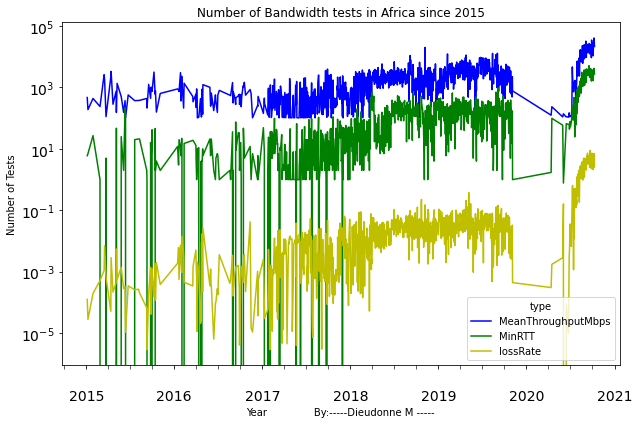

In [13]:
# plot above data 
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df_AFaggregated.date = pd.to_datetime(df_AFaggregated['date'], format='%Y-%m-%d')

styles = ['b','g','y', 'r']

df_AFaggregated.groupby(['date','type']).sum()['value'].unstack()

df_AFaggregated.groupby(['date','type']).sum()['value'].unstack().plot(style=styles, ax=ax)
ax.set_xlabel('Year               By:-----Dieudonne M -----')
ax.set_ylabel('Number of Tests')
ax.set_title('Number of Bandwidth tests in Africa since 2015')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
#ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.tick_params(axis="x", which="both", length=4)

plt.tick_params(labelsize=14)
plt.yscale("log")
plt.savefig("AF_2020_tests.pdf", bbox_inches="tight")
plt.show()
